In [2]:
from qiskit import *
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)
...
qc.measure(q,c)
qc.x(q[0]).c_if(c,1)

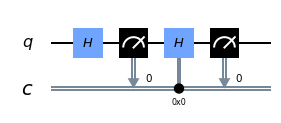

In [3]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with a single qubit
q = QuantumRegister(1,"q")
# define a classical register with a single bit
c = ClassicalRegister(1,"c")
# define a quantum circuit
qc = QuantumCircuit(q,c)

# apply the first Hadamard
qc.h(q[0])

# the first measurement
qc.measure(q,c)

# apply the second Hadamard if the measurement outcome is 0
qc.h(q[0]).c_if(c,0)

# the second measurement
qc.measure(q[0],c)

# draw the circuit
qc.draw(output="mpl")

In [4]:
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)   
print(counts)

{'0': 249, '1': 751}


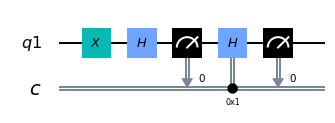

In [5]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with a single qubit
q = QuantumRegister(1)
# define a classical register with a single bit
c = ClassicalRegister(1,"c")
# define a quantum circuit
qc = QuantumCircuit(q,c)

# start in state |1>
qc.x(q[0])

# apply the first Hadamard
qc.h(q[0])

# the first measurement
qc.measure(q,c)

# apply the second Hadamard if the measurement outcome is 1
qc.h(q[0]).c_if(c,1)

# the second measurement
qc.measure(q[0],c)

# draw the circuit
qc.draw(output="mpl") 

In [6]:
# execute the circuit 1000 times in the local simulator

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)   
print(counts)

{'0': 761, '1': 239}


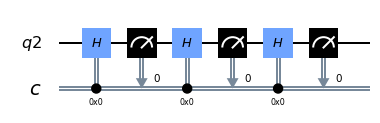

In [7]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

# define a quantum register with a single qubit
q = QuantumRegister(1)
# define a classical register with a single bit
c = ClassicalRegister(1,"c")
# define a quantum circuit
qc = QuantumCircuit(q,c)

for i in range(3):
    qc.h(q[0]).c_if(c,0)
    qc.measure(q,c)

# draw the circuit
qc.draw(output="mpl")

In [8]:
# execute the circuit 1000 times in the local simulator

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1000)
counts = job.result().get_counts(qc)   
print(counts)

{'0': 125, '1': 875}


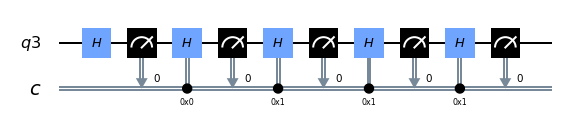

In [9]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
# import randrange for random choices
from random import randrange

# define a quantum register with a single qubit
q = QuantumRegister(1)
# define a classical register with a single bit
c = ClassicalRegister(1,"c")
# define a quantum circuit
qc = QuantumCircuit(q,c)

shot = 10000

observe = [0,0]

qc.h(q[0])
qc.measure(q,c)
observe = [shot/2,shot/2]

for i in range(4):
    x = randrange(2)
    if x==0:
        observe[0] = observe[0] / 2 
        observe[1] = observe[1] + observe[0]
    else:
        observe[1] = observe[1] / 2 
        observe[0] = observe[0] + observe[1]
    qc.h(q[0]).c_if(c,x)
    qc.measure(q,c)

# draw the circuit
qc.draw(output="mpl")

In [10]:
print('0:',round(observe[0]),'1:',round(observe[1]))

# execute the circuit 10000 times in the local simulator
job = execute(qc,Aer.get_backend('qasm_simulator'),shots=shot)
counts = job.result().get_counts(qc)   
print(counts)

0: 9062 1: 938
{'0': 9076, '1': 924}
